<a href="https://colab.research.google.com/github/karol10542/MachineLearning2021/blob/main/Frozen_Lake_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [49]:
env = gym.make("FrozenLake-v0",is_slippery= True)
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [50]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [51]:
'''  Dla przykładu: 15: {0: [(1.0, 15, 0, True)] , wartość 15: <- przed nawiasami oznacza numer obserwacji
                          1: [(1.0, 15, 0, True)],, wartości 0: do 3: oznaczają akcje które można wykonać
                          2: [(1.0, 15, 0, True)], 1.0 to wartość prawdopodobieństwa
                           3: [(1.0, 15, 0, True)]}}, druga kolumna w nawiasie kwadratowym oznacza wartosc kiedy dana akcja zostanie wykonana
                                                       kolumna trzecia to wartość tzw "nagroda"
                                                       ostatnia kolumna przyjmuje wartosci true lub false, w przypadku true konczymy działanie
'''

'  Dla przykładu: 15: {0: [(1.0, 15, 0, True)] , wartość 15: <- przed nawiasami oznacza numer obserwacji\n                          1: [(1.0, 15, 0, True)],, wartości 0: do 3: oznaczają akcje które można wykonać\n                          2: [(1.0, 15, 0, True)], 1.0 to wartość prawdopodobieństwa\n                           3: [(1.0, 15, 0, True)]}}, druga kolumna w nawiasie kwadratowym oznacza wartosc kiedy dana akcja zostanie wykonana\n                                                       kolumna trzecia to wartość tzw "nagroda"\n                                                       ostatnia kolumna przyjmuje wartosci true lub false, w przypadku true konczymy działanie\n'

In [52]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [53]:
def initialize_policy(n_states,n_actions):
  policy = np.zeros(shape=(n_states,n_actions)) + 1/n_actions
  return policy
policy = initialize_policy(n_states,n_actions)

In [55]:
def generate_session(env,policy,t_max=5000):
  observations, actions = [], []
  total_reward = 0.
  observation = env.reset()
  for t in range(t_max):
    action = np.random.choice(n_actions,p=policy[observation])
    new_observation,reward,done,info = env.step(action)

    observations.append(observation)
    actions.append(action)
    total_reward += reward
    observation = new_observation

    if done:
      break
  return observations,actions,total_reward

In [56]:

def select_elites(observations_batch, actions_batch, total_reward_batch, percentile):

    reward_threshold = np.percentile(total_reward_batch, percentile)

    elite_observations = []
    elite_actions = []

    for i in range(len(total_reward_batch)):
      if total_reward_batch[i] > reward_threshold:
        elite_observations += (observations_batch[i])
        elite_actions += (actions_batch[i])
        
    return elite_observations, elite_actions

In [57]:
sessions = [generate_session(env,policy) for _ in range(3)]
observations_batch,actions_batch, total_reward_batch = zip(*sessions)

In [58]:
percentile = 80

elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

In [59]:
def update_policy(elite_observations, elite_actions):

    policy_updated = policy

    elite_observations_unique = set(elite_observations)
    
    actions_count = {observation:[0] * n_actions for observation in elite_observations_unique}

    for observation, action in zip(elite_observations, elite_actions):
        actions_count[observation][action] += 1
        
        
        
    for observation in elite_observations_unique:
        policy_updated[observation] = np.array(actions_count[observation]) / np.sum(actions_count[observation])

    return policy_updated

In [60]:
policy_updated = update_policy(elite_observations,elite_actions)
print(policy_updated)

[[0.4  0.2  0.4  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   1.   0.   0.  ]
 [0.5  0.5  0.   0.  ]
 [0.25 0.25 0.25 0.25]]


In [78]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile):

    reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([reward, threshold])
    
    plt.figure(figsize=[8, 4])
    plt.plot(list(zip(*log))[0], label='rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    clear_output(True)
    print("reward = ", reward)
    print("treshold = ", threshold)
    plt.show()

In [79]:
env.reset()
policy = initialize_policy(n_states,n_actions)

reward =  0.09
treshold =  0.0


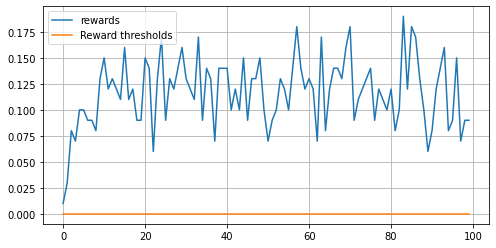

In [80]:
n_sessions = 100
percentile = 0.3
learning_rate = 0.2


log = []

for i in range(100):
  
    sessions = [generate_session(env, policy, t_max=5000) for j in range(n_sessions)]
    
    observations_batch, actions_batch, total_reward_batch = zip(*sessions)

    elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

    policy_updated = update_policy(elite_observations, elite_actions)

    policy = learning_rate * policy_updated + (1 - learning_rate) * policy

    show_progress(total_reward_batch, log, percentile)

In [73]:
policy

array([[0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

In [74]:
observation = env.reset()

for t in range(99):
  action = np.random.choice(n_actions, p=policy[observation])
  new_observation,reward,done, info = env.step(action)

  observation = new_observation
  print(t,done)
  env.render()

  if done:
    break

0 False
  (Up)
SFFF
FHFH
FFFH
HFFG
1 False
  (Up)
SFFF
FHFH
FFFH
HFFG
2 False
  (Up)
SFFF
FHFH
FFFH
HFFG
3 False
  (Up)
SFFF
FHFH
FFFH
HFFG
4 False
  (Up)
SFFF
FHFH
FFFH
HFFG
5 False
  (Up)
SFFF
FHFH
FFFH
HFFG
6 False
  (Up)
SFFF
FHFH
FFFH
HFFG
7 False
  (Up)
SFFF
FHFH
FFFH
HFFG
8 False
  (Up)
SFFF
FHFH
FFFH
HFFG
9 False
  (Up)
SFFF
FHFH
FFFH
HFFG
10 False
  (Right)
SFFF
FHFH
FFFH
HFFG
11 False
  (Left)
SFFF
FHFH
FFFH
HFFG
12 False
  (Left)
SFFF
FHFH
FFFH
HFFG
13 False
  (Left)
SFFF
FHFH
FFFH
HFFG
14 False
  (Right)
SFFF
FHFH
FFFH
HFFG
15 False
  (Right)
SFFF
FHFH
FFFH
HFFG
16 False
  (Right)
SFFF
FHFH
FFFH
HFFG
17 False
  (Right)
SFFF
FHFH
FFFH
HFFG
18 False
  (Right)
SFFF
FHFH
FFFH
HFFG
19 False
  (Left)
SFFF
FHFH
FFFH
HFFG
20 False
  (Right)
SFFF
FHFH
FFFH
HFFG
21 False
  (Right)
SFFF
FHFH
FFFH
HFFG
22 False
  (Right)
SFFF
FHFH
FFFH
HFFG
23 True
  (Left)
SFFF
FHFH
FFFH
HFFG
